In [1]:
import os
os.chdir('../')
import logging
import numpy as np
import pytorch_lightning as pl
import pandas as pd
logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(message)s'
    )
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
# Specify input file
msa_adata_p = '/home/xlv0877/proj_home/dl/data/dna/msa_ctrl_diff.h5ad'
msa_adata = sc.read(msa_adata_p)

/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `

In [14]:
key = 'ohe_2d'

In [15]:
# Check if it has the right input data
assert key in msa_adata.obsm

In [112]:
# Hyperparameter for data loader
batch_size = 1264
shuffle = True
train_val_split = 0.8
max_length = msa_adata.obsm[key].shape[1]
labels = msa_adata.obs['perturbation'].values

In [113]:
# Load model
from src.models.dna_vae import DNASequenceDataModule, DNASequenceVAE

dataloader = DNASequenceDataModule(
    msa_adata.obsm[key], 
    batch_size=batch_size, 
    shuffle=shuffle, 
    stratify_by=labels,
    train_val_split=train_val_split
)

In [114]:
# Hyperparameter for model
latent_dim = 100
hidden_dim = 128
epochs = 20

In [115]:
# Define model
model = DNASequenceVAE(
    input_dim=max_length,
    latent_dim=latent_dim, 
    hidden_dim=hidden_dim
)

In [116]:
import pytorch_lightning as pl
# Define trainer
trainer = pl.Trainer(max_epochs=epochs)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [117]:
# Train model
trainer.fit(model, dataloader)

/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /projects/b1042/GoyalLab/lschwartz/dl/lightning_logs/version_9696713/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params | Mode 
--------------------------------------------
0 | encoder | Encoder | 9.3 M  | train
1 | decoder | Decoder | 9.3 M  | train
--------------------------------------------
18.6 M    Trainable params
0         Non-trainable params
18.6 M    Total params
74.346    Total estimated model params size (MB)
15        Modules in train mode
0         Modules in eval mode
SLURM auto-requeueing enabled. Setting signal handlers.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (26) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


In [118]:
from src.models.dna_vae import get_latent_space

z = get_latent_space(model, dataloader.val_dataloader())

In [119]:
# Check out latent space
import anndata as ad
import scipy.sparse as sp

z_ad = ad.AnnData(X=sp.csr_matrix(z), obs=msa_adata[dataloader.val_idc].obs)

In [120]:
sc.pp.pca(z_ad)

In [121]:
sc.pp.neighbors(z_ad, n_neighbors=5)

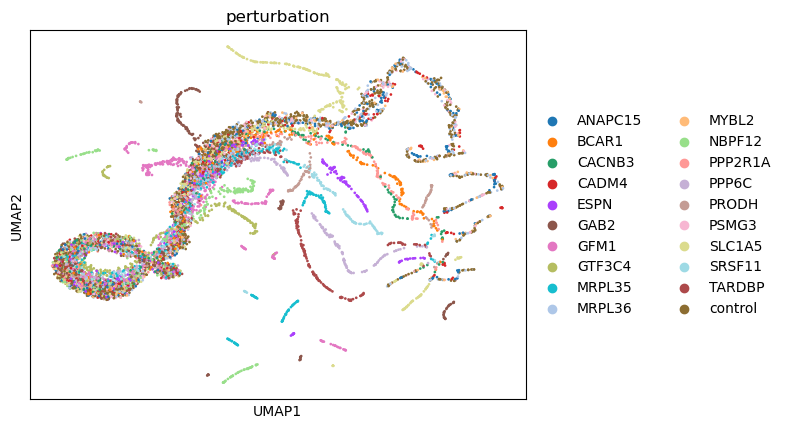

In [122]:
sc.tl.umap(z_ad)
sc.pl.umap(z_ad, color='perturbation')